In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
%matplotlib inline
%run ./master_experminet-functions.ipynb

In [5]:
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [6]:
n_samples = 1000000 
choices = [quick_sort,merge_sort,heap_sort]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf"]
reps = 2000

In [7]:
def plot_history(rewards,cum_rewards,chosen_arms ):

    fig = plt.figure(figsize=[30,8])

    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards")
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms.values()))], chosen_arms.values(), label=[i for i in ((list(chosen_arms.keys())))])
    ax3.set_title("Chosen Actions")

## Random Selection

In [8]:
#We recommend setting the reward to be the runtime of the operator during the round multiplied by −1

In [9]:
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

for n in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices)
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

Total reward 458.7908
Average rewards per algo {'quick_sort': 0.15725516224188796, 'merge_sort': 0.1722631424375916, 'heap_sort': 0.36639719188767544}
Count per chosen algo {'quick_sort': 678, 'merge_sort': 681, 'heap_sort': 641}


In [10]:
list(arm_counts.keys())

['quick_sort', 'merge_sort', 'heap_sort']

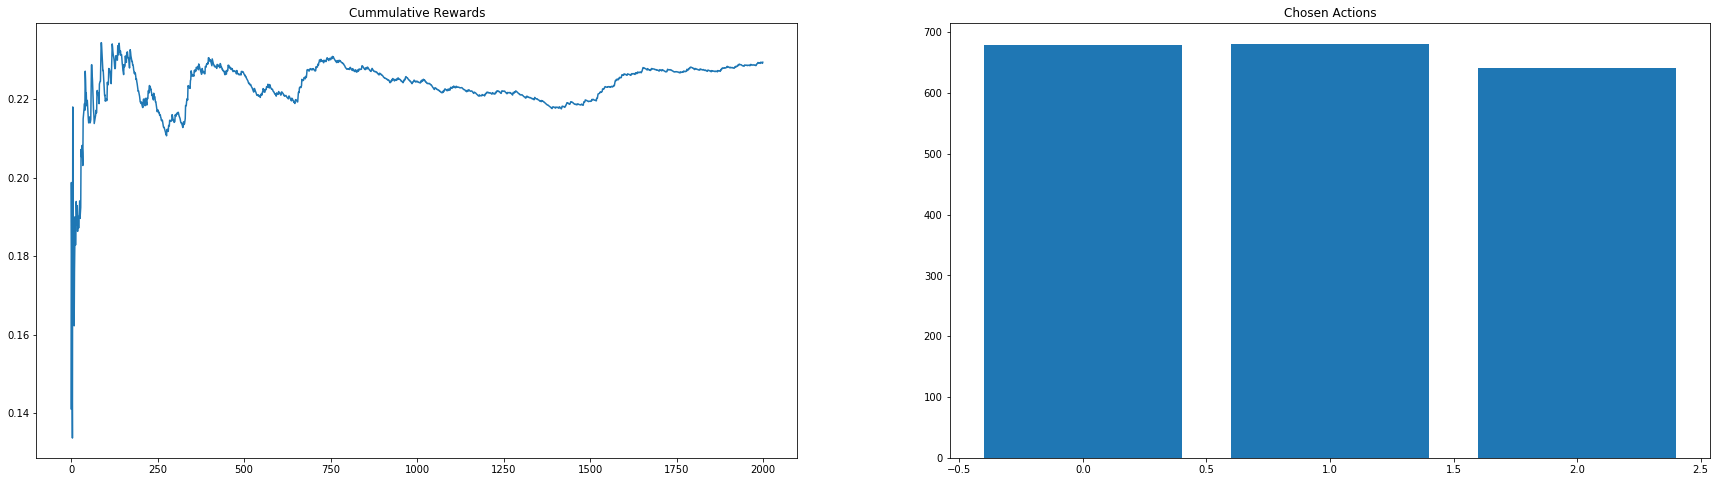

In [11]:
plot_history(rewards,cum_rewards, arm_counts )

## Epsilon-greedy
#### Exploit (1-e) of the time -> Explore (e) of the time

In [12]:
epsilon=0.01
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []


In [13]:
for i in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


Total reward 329.1039
Average rewards per algo {'quick_sort': 0.20969999999999997, 'merge_sort': 0.16377355163728013, 'heap_sort': 0.33368571428571425}
Count per chosen algo {'quick_sort': 8, 'merge_sort': 1985, 'heap_sort': 7}


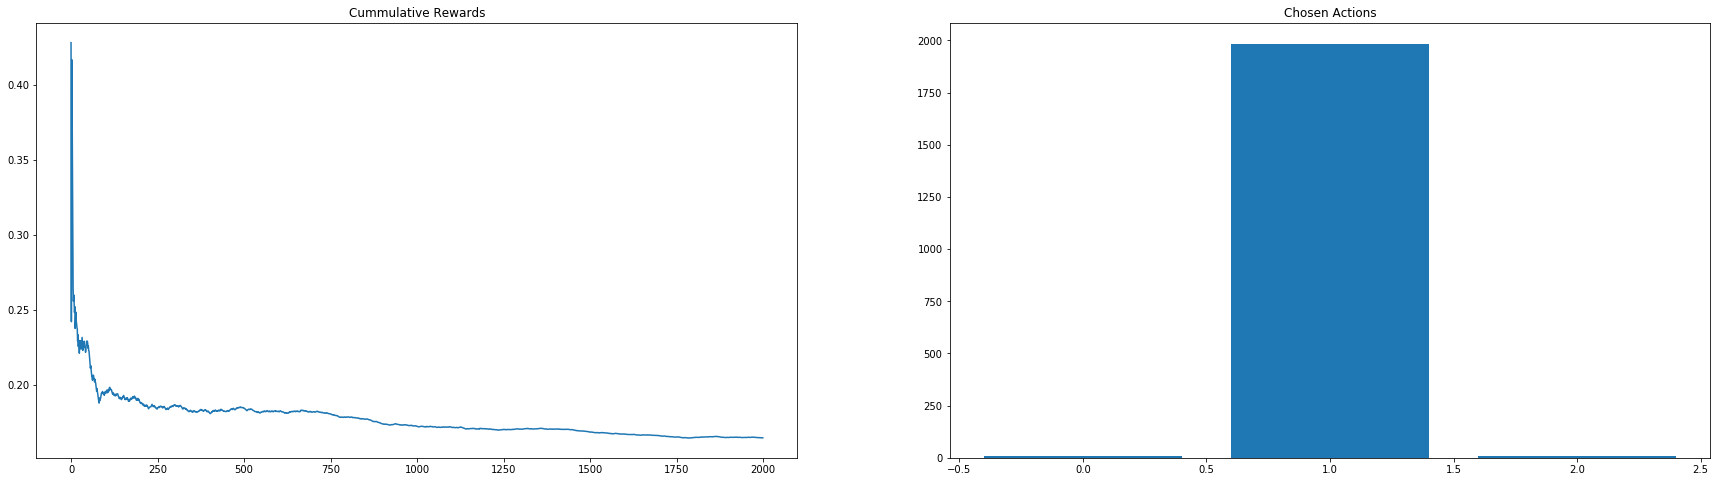

In [14]:
plot_history(rewards,cum_rewards, arm_counts)

In [15]:
epsilon=0.05
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [16]:
for i in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)


Total reward 333.7202
Average rewards per algo {'quick_sort': 0.16460989583333313, 'merge_sort': 0.16914666666666667, 'heap_sort': 0.2873599999999999}
Count per chosen algo {'quick_sort': 1920, 'merge_sort': 45, 'heap_sort': 35}


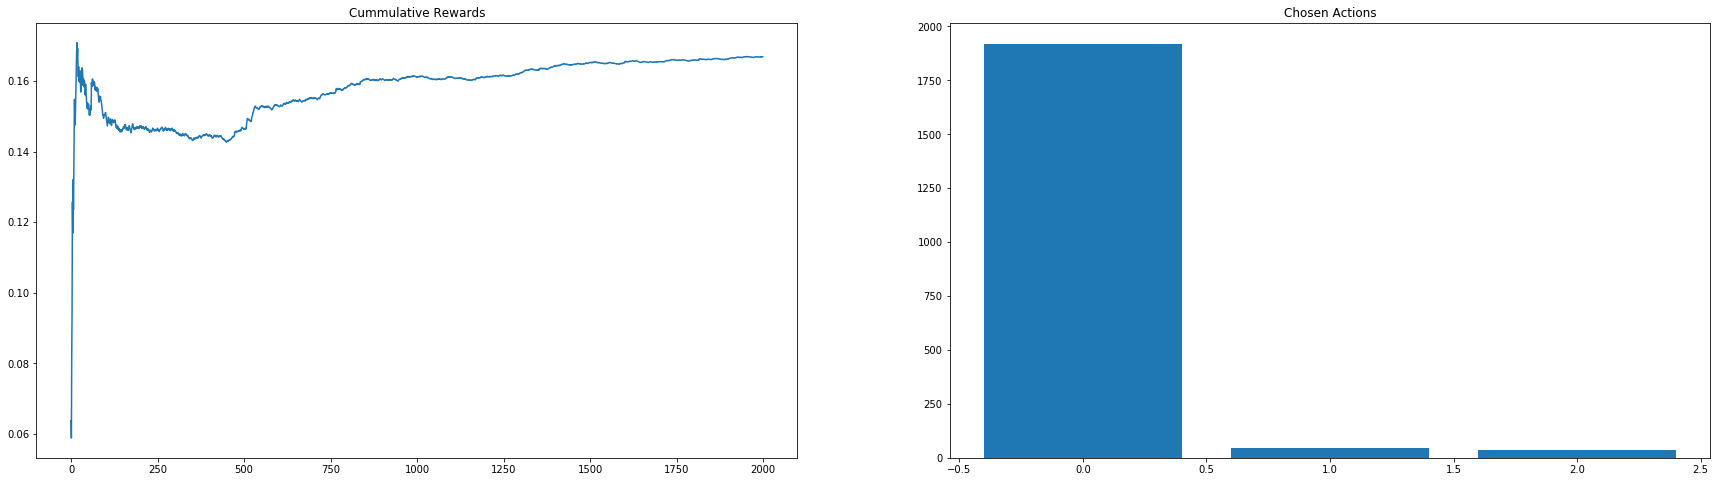

In [17]:
plot_history(rewards,cum_rewards, arm_counts)

In [18]:
epsilon=0.1
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

In [19]:
for i in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = np.random.choice(choices) if np.random.random() < epsilon else choices[np.argmin(list(q_values.values()))]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

Total reward 352.728
Average rewards per algo {'quick_sort': 0.16682860215053752, 'merge_sort': 0.21122676056338033, 'heap_sort': 0.397531884057971}
Count per chosen algo {'quick_sort': 1860, 'merge_sort': 71, 'heap_sort': 69}


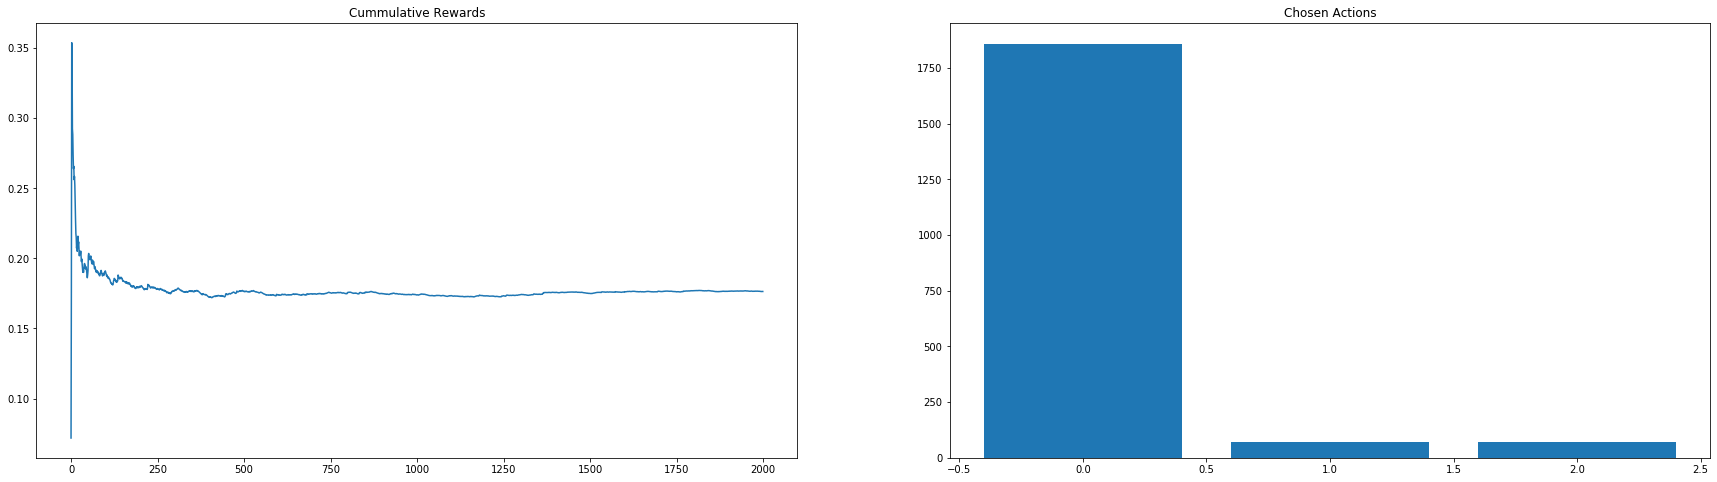

In [20]:
plot_history(rewards,cum_rewards, arm_counts)

## Thompson Sampling

# Probabs sampled from Beta distribution

In [21]:

total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
thetas = np.zeros(reps)

rewards = []
cum_rewards = []
a = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
b = {"quick_sort": 1, "merge_sort": 1, "heap_sort":1}
theta = [0,0,0]

In [22]:
for i in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    theta =  np.random.beta(list(a.values()),list(b.values()))
    alg = choices[np.argmin(theta)]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    total_reward += reward
    a[alg.__name__] += reward
    b[alg.__name__] += 1 - reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

SyntaxError: invalid syntax (<ipython-input-22-692941d261d3>, line 12)

In [ ]:
plot_history(rewards,cum_rewards, arm_counts)

# Upper Confidence Bound

In [ ]:
total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  

rewards = []
cum_rewards = []


In [ ]:
for i in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    max_upper_bound = 0
    for n in range(0,len(choices)):
        if list(arm_counts.values())[n] > 0:
            average_reward = list(arm_rewards.values())[n]/list(arm_counts.values())[n]
            delta_i = math.sqrt(2 * math.log(i+1) / list(arm_counts.values())[n])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            alg = choices[n]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)*(1)
    total_reward += reward
    a[alg.__name__] += reward
    b[alg.__name__] += 1 - reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

In [ ]:
plot_history(rewards,cum_rewards, arm_counts)

In [ ]:
# Only quick sort

total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

for n in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = quick_sort
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

In [ ]:
plot_history(rewards,cum_rewards, arm_counts )

In [ ]:
# Only merge sort

total_reward = 0
arm_rewards = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
q_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0} ## 
rewards = []
cum_rewards = []

for n in range(reps):
    dist_type = np.random.choice(dist_types)
    distribion =  create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    alg = merge_sort
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = np.round((time.time() - start_time),4)
    #print(alg.__name__, reward)
    total_reward += reward
    arm_rewards[alg.__name__] += reward
    arm_counts[alg.__name__] += 1
    q_values[alg.__name__] = arm_rewards[alg.__name__]/arm_counts[alg.__name__]
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)

In [ ]:
plot_history(rewards,cum_rewards, arm_counts )